
PART A
Train Accuracy: 0.7396694214876033
Test Accuracy: 0.8360655737704918
Confusion Matrix:
 [[26  3]
 [ 7 25]]
Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Shortcomings: Underfits, only 1 split, high bias, low complexity.

PART B

lr=0.1, n=5, acc=0.9016
lr=0.1, n=10, acc=0.8852
lr=0.1, n=25, acc=0.8852
lr=0.1, n=50, acc=0.8689
lr=0.1, n=100, acc=0.8525
lr=0.5, n=5, acc=0.8689
lr=0.5, n=10, acc=0.8525
lr=0.5, n=25, acc=0.8525
lr=0.5, n=50, acc=0.8361
lr=0.5, n=100, acc=0.8525
lr=1.0, n=5, acc=0.8689
lr=1.0, n=10, acc=0.8525
lr=1.0, n=25, acc=0.8689
lr=1.0, n=50, acc=0.8197
lr=1.0, n=100, acc=0.8197


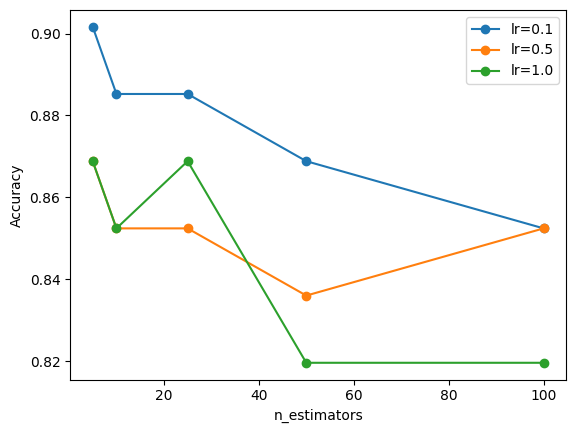


Best Test Accuracy: 0.9016393442622951


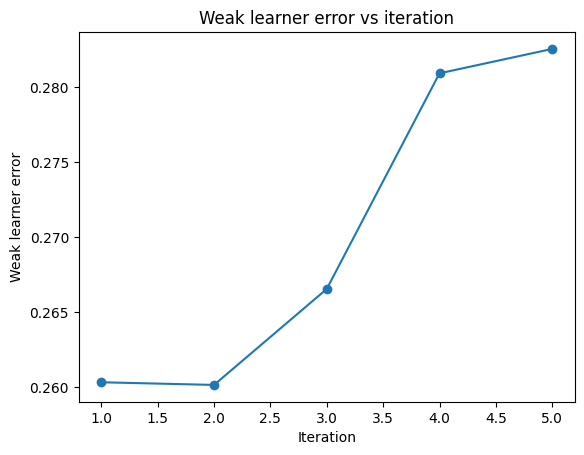

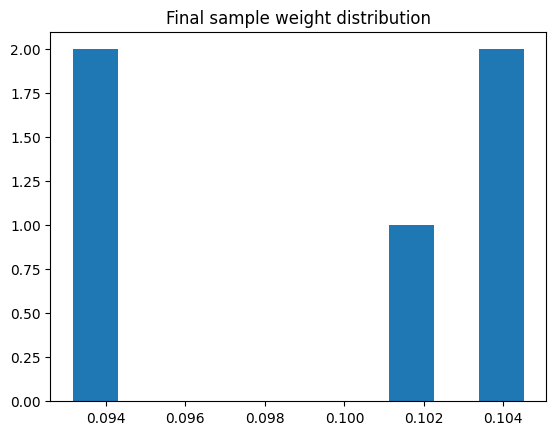


Hard samples (misclassified often) get higher weights.
AdaBoost focuses on them to reduce overall errors.


Top 5 Important Features:
   Feature  Importance
11      ca    0.399137
2       cp    0.397335
12    thal    0.203528
0      age    0.000000
1      sex    0.000000


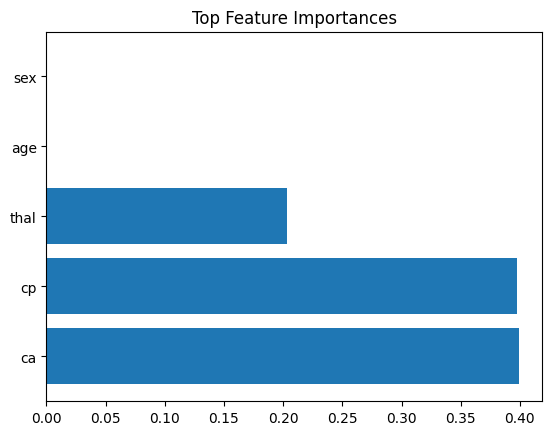


These features relate to heart stress, blood flow, and blockages,
which are medically strong indicators of heart disease.



In [3]:
# AdaBoost on UCI Heart Dataset

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
data = fetch_openml(name='heart-disease', version=1, as_frame=True, target_column='target')
X = data.data
y = data.target.astype(int)
y = (y > 0).astype(int)   # convert to binary

# Train-test split + scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------ PART A: Decision stump ------------------
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)

print("\nPART A")
print("Train Accuracy:", accuracy_score(y_train, stump.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, stump.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, stump.predict(X_test)))
print("Report:\n", classification_report(y_test, stump.predict(X_test)))

print("\nShortcomings: Underfits, only 1 split, high bias, low complexity.\n")

# ------------------ PART B: AdaBoost ------------------
n_estimators_list = [5, 10, 25, 50, 100]
learning_rates = [0.1, 0.5, 1.0]

best_acc = 0
best_model = None

print("PART B\n")
for lr in learning_rates:
    accs = []
    for n in n_estimators_list:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n,
            learning_rate=lr,
            random_state=42
        )
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))
        accs.append(acc)

        if acc > best_acc:
            best_acc = acc
            best_model = model

        print(f"lr={lr}, n={n}, acc={acc:.4f}")

    plt.plot(n_estimators_list, accs, marker='o', label=f"lr={lr}")

plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\nBest Test Accuracy:", best_acc)

# ------------------ PART C: Misclassification pattern ------------------
errors = best_model.estimator_errors_

plt.plot(range(1, len(errors)+1), errors, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Weak learner error")
plt.title("Weak learner error vs iteration")
plt.show()

# Final sample weights
sample_weights = best_model.estimator_weights_
plt.hist(sample_weights, bins=10)
plt.title("Final sample weight distribution")
plt.show()

print("""
Hard samples (misclassified often) get higher weights.
AdaBoost focuses on them to reduce overall errors.
""")

# ------------------ PART D: Feature importance ------------------
importances = best_model.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
top5 = feat_imp.sort_values("Importance", ascending=False).head(5)

print("\nTop 5 Important Features:")
print(top5)

plt.barh(top5["Feature"], top5["Importance"])
plt.title("Top Feature Importances")
plt.show()

print("""
These features relate to heart stress, blood flow, and blockages,
which are medically strong indicators of heart disease.
""")


--- Decision Stump ---
Train Accuracy: 0.6525986611893196
Test Accuracy: 0.6510634035591466
Confusion Matrix:
 [[171929  17581]
 [ 97380  42571]]

Round 1
Misclassified indices: [1, 2, 7, 8, 13, 20, 21, 26, 28, 29, 32, 35, 36, 38, 41, 45, 46, 50, 55, 59]
Their weights: [1.30082655e-06 1.30082655e-06 1.30082655e-06 1.30082655e-06
 1.30082655e-06 1.30082655e-06 1.30082655e-06 1.30082655e-06
 1.30082655e-06 1.30082655e-06 1.30082655e-06 1.30082655e-06
 1.30082655e-06 1.30082655e-06 1.30082655e-06 1.30082655e-06
 1.30082655e-06 1.30082655e-06 1.30082655e-06 1.30082655e-06]

Round 2
Misclassified indices: [0, 7, 8, 10, 12, 13, 17, 20, 21, 22, 25, 28, 29, 32, 38, 45, 48, 50, 55, 60]
Their weights: [9.96651252e-07 1.87222443e-06 1.87222443e-06 9.96651252e-07
 9.96651252e-07 1.87222443e-06 9.96651252e-07 1.87222443e-06
 1.87222443e-06 9.96651252e-07 9.96651252e-07 1.87222443e-06
 1.87222443e-06 1.87222443e-06 1.87222443e-06 1.87222443e-06
 9.96651252e-07 1.87222443e-06 1.87222443e-06 1.872224

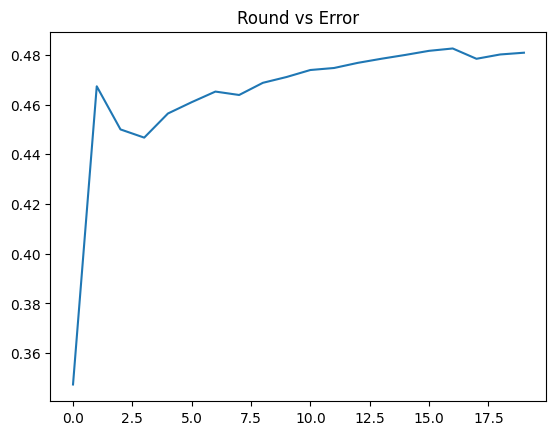

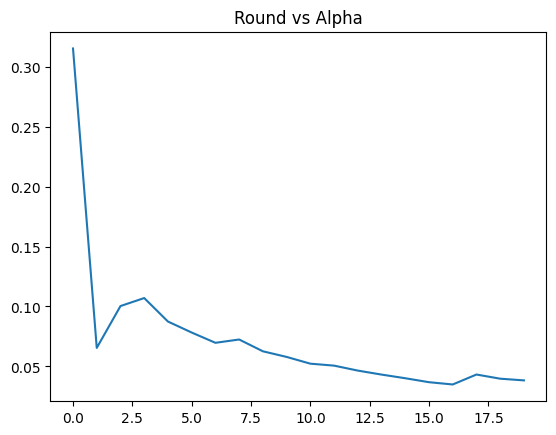


--- Sklearn AdaBoost ---
Train Accuracy: 0.6980066134021558
Test Accuracy: 0.6974573621764033
Confusion Matrix:
 [[165863  23647]
 [ 76029  63922]]


In [9]:
# WISDM AdaBoost Code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
import requests # Import the requests library

# ---------- Part A: Load & Prepare Data ----------

# Load dataset
file_path = "https://raw.githubusercontent.com/curiousily/TensorFlow-on-Android-for-Human-Activity-Recognition-with-LSTMs/master/data/WISDM_ar_v1.1_raw.txt"
cols = ["user", "activity", "timestamp", "x", "y", "z"]

# Read and clean using requests
data = []
response = requests.get(file_path)
response.raise_for_status() # Raise an exception for bad status codes

for line in response.text.splitlines():
    parts = line.strip().split(",")
    if len(parts) >= 6:
        try:
            data.append(parts[:6])
        except:
            continue

df = pd.DataFrame(data, columns=cols)

# Convert numeric columns
for c in ["x", "y", "z"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna()

# Binary label mapping
vigorous = ["Jogging", "Upstairs"]
df["label"] = df["activity"].apply(
    lambda x: 1 if x in vigorous else 0
)

# Features and target
X = df[["x", "y", "z"]].values
y = df["label"].values

# Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---------- Part B: Decision Stump ----------

stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X_train, y_train)

train_pred = stump.predict(X_train)
test_pred = stump.predict(X_test)

print("\n--- Decision Stump ---")
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

# ---------- Part C: Manual AdaBoost (T = 20) ----------

T = 20
n = len(y_train)
w = np.ones(n) / n
learners = []
alphas = []
errors = []

for t in range(T):
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X_train, y_train, sample_weight=w)
    pred = clf.predict(X_train)

    miss = (pred != y_train).astype(int)
    err = np.sum(w * miss)
    err = max(err, 1e-10)

    alpha = 0.5 * np.log((1 - err) / err)

    # Print required info
    idx = np.where(miss == 1)[0]
    print(f"\nRound {t+1}")
    print("Misclassified indices:", idx.tolist()[:20])
    print("Their weights:", w[idx][:20])

    # Update weights
    y_sign = np.where(y_train == 1, 1, -1)
    p_sign = np.where(pred == 1, 1, -1)

    w = w * np.exp(-alpha * y_sign * p_sign)
    w = w / np.sum(w)

    learners.append(clf)
    alphas.append(alpha)
    errors.append(err)

# Strong classifier
def predict_ada(X):
    s = np.zeros(len(X))
    for a, clf in zip(alphas, learners):
        p = clf.predict(X)
        p = np.where(p == 1, 1, -1)
        s += a * p
    return np.where(s >= 0, 1, 0)

train_pred = predict_ada(X_train)
test_pred = predict_ada(X_test)

print("\n--- Manual AdaBoost ---")
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

# Plots
plt.plot(errors)
plt.title("Round vs Error")
plt.show()

plt.plot(alphas)
plt.title("Round vs Alpha")
plt.show()

# ---------- Part D: Sklearn AdaBoost ----------

sk_ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0
)
sk_ada.fit(X_train, y_train)

train_pred = sk_ada.predict(X_train)
test_pred = sk_ada.predict(X_test)

print("\n--- Sklearn AdaBoost ---")
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
